We want to see if the convergence of the model is more important

In [1]:
# preparation of the environment
%load_ext autoreload
%autoreload 2

INF = 1e30

import os
from os import path


# set the repository to the git repository
cwd = os.getcwd().split(os.path.sep)
while cwd[-1] != "BertPlausibilityStudy":
    os.chdir("..")
    cwd = os.getcwd().split(os.path.sep)
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from tqdm.notebook import tqdm
from statannot import add_stat_annotation
from torch_set_up import DEVICE
from entropy_reg_training_bert_snli import BertNliRegu
from DataModules.SnliDM import ESNLIDataModule

In [2]:
%%capture
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
plt.subplots_adjust(
    left=0.1,
    bottom=0.1,
    right=0.9,
    top=0.9,
    wspace=0.3,
    hspace=0.1
)
y_lims = (-0.5, 1.7)
ax.set_ylim(y_lims[0], y_lims[1])

## Import the data

In [3]:
# load the data
import pickle
d = os.path.join(".cache", "plots", "e_snli", "regu_study", "entropy_regu")
muls = ["mul=0.0", "mul=0.005", "mul=0.05", "mul=0.5"]

# loading the data
cosine_distribution = {}
for mul in muls: 
    with open(os.path.join(d, mul, "cosine_distribution.pickle"), "rb") as f:
        cosine_distribution[mul] = pickle.load(f)

In [4]:
plots = {}
for id_k, k in tqdm(enumerate(["entailement", "neutral", "contradiction"]), total=3):
    x = []
    y = []
    hue = []
    for mul in muls:
        buff = cosine_distribution[mul][k][:, 0:100000]
        y_buff = list(buff.flatten())
        x_buff = []
        hue_buff = [mul] * len(y_buff)
        t = buff.shape[1]
        for l in range(13):
            x_buff += [f"Layer {l}"] * t
            
        x += x_buff
        y += y_buff
        hue += hue_buff
        
    plots[k] = (x, y, hue) 

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
box_pairs = []
for l in range(0, 13):
    box_pairs += [
        [((f"Layer {l}", f"mul={0.0}"),(f"Layer {l}", f"mul={x}")) for x in [0.005, 0.05, 0.5]]
    ][0]

In [6]:
%%capture
x,y,hue = [], [], []

for id_k, k in enumerate(["entailement", "neutral", "contradiction"]):
    x_b,y_b,hue_b = plots[k]
    x += x_b
    y += y_b
    hue += hue_b
    
ax = sns.boxplot(x=x ,y=y, hue=hue, ax=ax)
df = pd.DataFrame({"x": x, "y": y, "hue":hue})
add_stat_annotation(
    ax, data=df,
    x="x", y="y", hue="hue",
    box_pairs=box_pairs,
    test='t-test_welch', 
    text_format='star',
    loc='inside',
    verbose=2
)
ax.set_title("Similarity distribution")

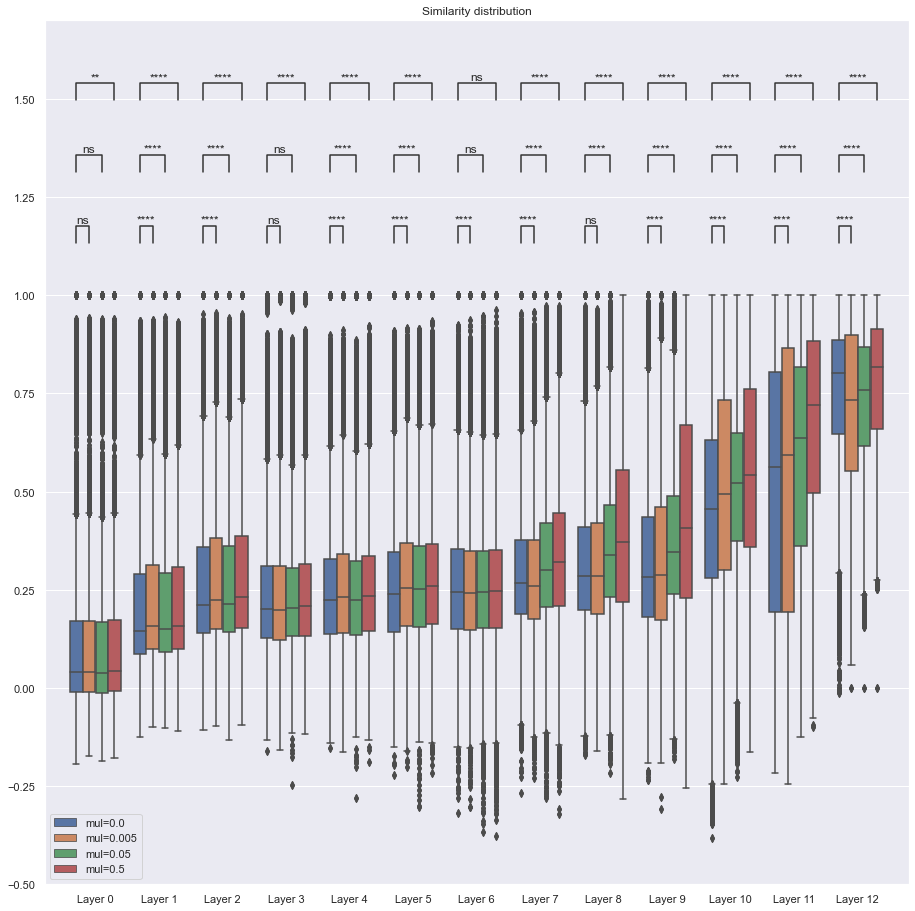

In [7]:
fig

In [8]:
fig.savefig(os.path.join(".cache","plots","e_snli","regu_study","entropy_regu","cos_distribution.png"))